In [1]:
## Importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the Data

In [2]:
## Import dataset
df = pd.read_csv("Complete Dataset.csv")

## Checking the Data for NaN value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20000 non-null  int64  
 1   track_id          20000 non-null  object 
 2   track_name        20000 non-null  object 
 3   artist_name       20000 non-null  object 
 4   id                19999 non-null  object 
 5   uri               19999 non-null  object 
 6   track_href        19999 non-null  object 
 7   analysis_url      19999 non-null  object 
 8   year              20000 non-null  int64  
 9   danceability      19999 non-null  float64
 10  energy            19999 non-null  float64
 11  key               19999 non-null  float64
 12  loudness          19999 non-null  float64
 13  mode              19999 non-null  float64
 14  speechiness       19999 non-null  float64
 15  acousticness      19999 non-null  float64
 16  instrumentalness  19999 non-null  float6

There is only 1 NaN value, checking is it only in one row or more

In [3]:
df[df["time_signature"].isnull()]

,Unnamed: 0,track_id,track_name,artist_name,id,uri,track_href,analysis_url,year,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,popularity
6795,6795,04boE4u1AupbrGlI62WvoO,White Noise 3 Hour Long,Erik Eriksson,NaN,NaN,NaN,NaN,2016,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60


In [4]:
## Dropping the row which has NaN values across the audio features and unnamed: 0 row
df.dropna(inplace=True)
df.drop("Unnamed: 0",axis=1,inplace=True)

## Describing the data to see the range for all audio features
df.describe()

,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
count,19999.000000,19999.000000,19999.000000,19999.00000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,1.999900e+04,19999.000000,19999.000000
mean,2014.499925,0.592448,0.622738,5.19216,-7.612908,0.653633,0.100349,0.267877,0.082162,0.188422,0.451014,120.517403,2.249329e+05,3.909895,59.833142
std,2.872405,0.173208,0.226478,3.58331,5.000768,0.475824,0.108615,0.299064,0.239125,0.153894,0.241180,30.774287,8.875856e+04,0.448332,9.125417
min,2010.000000,0.000000,0.000020,0.00000,-54.837000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.030100e+04,0.000000,41.000000
25%,2012.000000,0.489000,0.486000,2.00000,-8.553000,0.000000,0.036600,0.025900,0.000000,0.097500,0.261000,96.067000,1.889395e+05,4.000000,53.000000
50%,2014.000000,0.606000,0.654000,5.00000,-6.368000,1.000000,0.052600,0.135000,0.000002,0.123000,0.435000,120.039000,2.169470e+05,4.000000,60.000000
75%,2017.000000,0.717000,0.798000,8.00000,-4.842000,1.000000,0.113000,0.442000,0.000788,0.231000,0.629000,140.129500,2.490005e+05,4.000000,66.000000
max,2019.000000,0.986000,1.000000,11.00000,1.023000,1.000000,0.950000,0.996000,1.000000,0.990000,0.990000,220.099000,5.403500e+06,5.000000,100.000000


Features Description according to audio features description from Spotify API
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
- Year - Year the song was published
- duration_ms - The duration of the track in milliseconds.
- key - 	The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. (Range 0-11)
- mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- time_signature - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
- danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 
- instrumentalness - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
- speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
- valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 
- tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- popularity - The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. 

In [6]:
## Checking the unique label for time signature
df["time_signature"].value_counts()

4.0    18041
3.0     1414
5.0      329
1.0      143
0.0       72
Name: time_signature, dtype: int64

### There are few problems from the dataset : 
    1. What does time_signature 0, 1, and 5 means?
    2. There are tracks with long duration than most usual song
    3. The data seems to include podcast/talkshow, which shouldn't be count as music. While instrumental should be okay
    4. There are binaural sounds in the data, which people may listen for therapic purpose. We'll try to filter out those
    
### Things to do:
    1. Check some sample from song with 0,1, 5 time signature to determine if it's a valid category or we can just drop it (544 rows)
    2. Create a range for duration that make sense for a music duration
    3. Using "speechiness" features to filter out the talkshow/podcast
    4. Using "tempo" features to filter out the binaural recording

### 1. Clean Time Signature Categorization


The fairly normal time signature is 2/4, 3/4, 4/4. Having 0 or 1 doesn't make sense and 5 can be categorized in 5/4 or 5/8
Referencing from https://github.com/spotify/web-api/issues/379 it seems that there was and still an issue with their model for identifying other that 2/4, 3/4 and 4/4. To avoid data confusion, all data with 0,1, and 5 will be dropped

In [7]:
time_error = df[(df["time_signature"]==0) | (df["time_signature"]==1) | (df["time_signature"]==5)].index
df.drop(time_error,inplace=True)

### 2. Filter music duration

Text(0.5, 1.0, 'Duration Data Distribution')

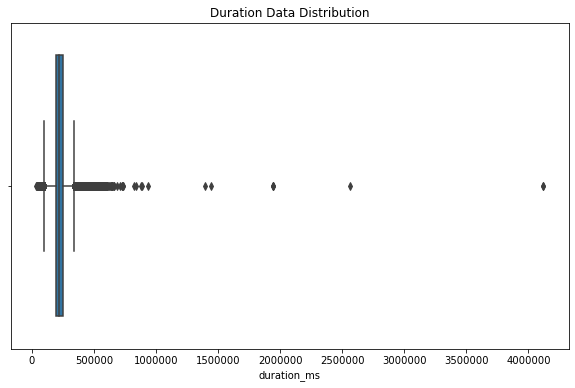

In [8]:
## Checking distribution of duration
plt.figure(figsize=(10,6))
sns.boxplot(df["duration_ms"])
plt.title("Duration Data Distribution")

In [9]:
### Setting the outlier data
q1 = df["duration_ms"].quantile(0.25)
q3 = df["duration_ms"].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)

df[(df["duration_ms"] < lower_limit) | (df["duration_ms"] > upper_limit)][["track_name","artist_name","duration_ms"]].sort_values(by="duration_ms",ascending=False).shape

(1059, 3)

There are 1059 outlier data, checking the data actual track type

### Checking tracks outside the outlier

In [10]:
df[df["duration_ms"] < lower_limit][["track_name","artist_name","duration_ms"]].sort_values(by="duration_ms").head(5)

,track_name,artist_name,duration_ms
11973,Hit the Road Jack (Park Mix),DH Organist,32319.0
5559,Sometimes...,"Tyler, The Creator",36160.0
19801,Sugar Plum Fairy,Max & Ruby,36387.0
6773,Frank's Track,Kanye West,38333.0
14427,Fertilizer,Frank Ocean,39640.0


It seems that the songs under lower limit can still be count as a music, so rows under lower limit will not be dropped

In [11]:
df[df["duration_ms"] >upper_limit][["track_name","artist_name","duration_ms"]].sort_values(by="duration_ms",ascending=True).head(10)

,track_name,artist_name,duration_ms
13613,Lord of the Rings,The Piano Guys,338253.0
16811,Brendan's Death Song,Red Hot Chili Peppers,338333.0
6309,drugs,EDEN,338333.0
13004,Holy Grail,JAY-Z,338413.0
12136,Holy Grail,JAY-Z,338413.0
2585,STOP TRYING TO BE GOD,Travis Scott,338438.0
18971,Last Call for the Blues,Cody Jinks,338693.0
16270,Levels,Avicii,338867.0
19903,Deuces Remix,Chris Brown,338920.0
8034,90210 (feat. Kacy Hill),Travis Scott,339067.0


There are still quite normal song with normal upper_limit, so try to fine tune with the upperlimit

In [15]:
df[df["duration_ms"] > 1.65*upper_limit][["track_name","artist_name","duration_ms"]].sort_values(by="duration_ms",ascending=True).head(10)

,track_name,artist_name,duration_ms
10337,Under Pressure,Logic,559533.0
15182,Shivaratri,Benjy Wertheimer,563400.0
6619,Futura Free,Frank Ocean,564166.0
11679,"Piano Concerto No.3 in C, Op.26: 1. Andante - ...",Sergei Prokofiev,564640.0
1560,Breakthrough - Live,Red Rocks Worship,567093.0
10189,Broken Vessels (Amazing Grace) - Live,Hillsong Worship,568787.0
15208,Tranquil Rumbling Thunderstorm,Nature Sounds,570003.0
15984,Calm Tropical Rainforest Nature Sounds,Nature Sounds,570036.0
15358,Soothing Approaching Storm with Warning Thunde...,Nature Sounds,570036.0
14303,Thoughtful Approaching Thunderstorm,Nature Sounds,570069.0


In [12]:
## Dropping rows more than 1.65x upper limit
duration_outlier = df[df["duration_ms"] > 1.65*upper_limit].index
df.drop(duration_outlier,inplace=True)

### 3. Filter out talkshow/podcast tracks from music tracks

> speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

In [13]:
### Selecting rows to drop based on the description
speechiness_index = df[df["speechiness"]>0.66].sort_values(by="speechiness").index
df.drop(speechiness_index,inplace=True)

### 4. Filter out binaural audio from music tracks

Using the outlier to detect binaural audio (usually has very low tempo)

In [15]:
## Using outlier to check lower limit
tempoq1 = df["tempo"].quantile(0.25)
tempoq3 = df["tempo"].quantile(0.75)
tempoiqr = tempoq3 - tempoq1
lower_limit = tempoq1 - (tempoiqr * 1.5)
upper_limit = tempoq3 + (tempoiqr * 1.5)

In [16]:
df[df["tempo"] < lower_limit]

,track_id,track_name,artist_name,id,uri,track_href,analysis_url,year,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,popularity


It seems that the songs with less than lower limit have been dropped in the previous step (duration)

## Creating CSV for modelling and referencing

In [28]:
df.reset_index(inplace=True)
df_model = df.select_dtypes(np.number)
df_model.drop(labels="year",axis=1,inplace=True)
df_model["track_name"] = df["track_name"]
df_model["artist_name"] = df["artist_name"]
df_model.drop('index',axis=1,inplace=True)
df_model

C:\Users\Windows\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Windows\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,track_name,artist_name
0,0.8960,0.586,10.0,-6.687,0.0,0.0559,0.104000,0.000000,0.7900,0.64200,116.971,196653.0,4.0,100,The Box,Roddy Ricch
1,0.7870,0.673,11.0,-4.577,0.0,0.1580,0.256000,0.000004,0.0904,0.78600,110.962,237893.0,4.0,97,Say So,Doja Cat
2,0.8310,0.499,11.0,-8.442,0.0,0.1140,0.269000,0.000000,0.3000,0.51100,97.956,220487.0,4.0,91,High Fashion (feat. Mustard),Roddy Ricch
3,0.7940,0.793,11.0,-4.521,0.0,0.0842,0.012500,0.000000,0.0952,0.67700,123.941,183290.0,4.0,97,Don't Start Now,Dua Lipa
4,0.6950,0.762,0.0,-3.497,1.0,0.0395,0.192000,0.002440,0.0863,0.55300,120.042,215280.0,4.0,95,Circles,Post Malone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19328,0.8360,0.547,6.0,-8.245,0.0,0.2050,0.174000,0.000048,0.1250,0.42200,139.732,224133.0,4.0,43,Love Is Not Enough,Yelawolf
19329,0.9470,0.532,1.0,-6.391,1.0,0.1370,0.030500,0.116000,0.2160,0.72800,109.989,209880.0,4.0,42,Give Me the Beat,Ghostland Observatory
19330,0.3480,0.717,4.0,-5.634,1.0,0.0882,0.311000,0.000000,0.0786,0.28000,66.210,416778.0,4.0,53,We Are the World 25 for Haiti,Artists for Haiti
19331,0.0855,0.788,6.0,-17.565,0.0,0.0655,0.577000,0.866000,0.4120,0.00001,86.906,213440.0,4.0,47,Ocean Sea Waves & Thunderstorms for Fussy Babi...,Soothing White Noise for Infant Sleeping and M...


In [29]:
### Cleaned dataset with all features in case to reference the track info in the further
df.to_csv("Spotify Dataset Cleaned Ref.csv")

### Cleaned dataset with only necessary features for modelling
df_model.to_csv("Spotify Dataset Cleaned Model.csv")

